In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time as t
from sklearn.metrics import confusion_matrix

In [2]:
data_1 = pd.read_csv(r'D:\College Education\Semester 5\19CSE304 Foundations of Data Science\Project\core_table.csv')
data_2 = pd.read_csv(r'D:\College Education\Semester 5\19CSE304 Foundations of Data Science\Project\Occurrence_ext.csv')
data = pd.merge(data_1, data_2, on='occurrenceID')
data

,scientificName,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,country,geodeticDatum
0,Attalea allenii,Attalea allenii,Stflowlen,Staminate_flower_length,0.98,cm,NaN,1,1,1,684.0,4735,MO,9.400000,-79.130000,90.0,Panama,PANAMA,EPSG:4326
1,Attalea allenii,Attalea allenii,Straclen,Staminate_rachilla_length,3.00,cm,NaN,1,1,1,684.0,4735,MO,9.400000,-79.130000,90.0,Panama,PANAMA,EPSG:4326
2,Attalea allenii,Attalea allenii,Petiole,Petiole_length,150.00,cm,http://purl.obolibrary.org/obo/TO_0000766,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
3,Attalea allenii,Attalea allenii,Seeds,Seed_count,3.00,count,http://purl.obolibrary.org/obo/TO_0000445,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
4,Attalea allenii,Attalea allenii,Pinwid,Median_leaflet_width,3.80,cm,NaN,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138988,Welfia regia,Welfia regia,RACHILLWID,Rachilla_thickness,1.79,cm,NaN,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138989,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.48,cm,http://purl.obolibrary.org/obo/TO_0002626,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138990,Welfia regia,Welfia regia,FRUITDIAM,Fruit_width,1.53,cm,http://purl.obolibrary.org/obo/TO_0002627,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138991,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.17,cm,http://purl.obolibrary.org/obo/TO_0002626,2005,3146,16956,82.0,25210,BH,6.150000,-73.660000,1097.0,Colombia,COLOMBIA,EPSG:4326


In [3]:
data.isna().sum()

scientificName             2529
verbatimScientificName        0
verbatimTraitName             0
traitName                     0
traitValue                    0
traitUnit                     0
traitID                   53787
taxonID                       0
measurementID                 0
occurrenceID                  0
identificationID          46259
recordNumber               6486
institutionCode            6321
verbatimLatitude           5334
verbatimLongitude          5334
verbatimElevation         46058
verbatimCountry            6115
country                    6125
geodeticDatum                 0
dtype: int64

In [4]:
data.nunique()

scientificName              535
verbatimScientificName      617
verbatimTraitName           158
traitName                    50
traitValue                 2164
traitUnit                     3
traitID                      25
taxonID                    2005
measurementID              3146
occurrenceID              16956
identificationID            851
recordNumber              10888
institutionCode              89
verbatimLatitude           3172
verbatimLongitude          4632
verbatimElevation           791
verbatimCountry              82
country                      60
geodeticDatum                 3
dtype: int64

In [5]:
data.dropna(subset = ['traitID'], inplace=True)
data

,scientificName,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,country,geodeticDatum
2,Attalea allenii,Attalea allenii,Petiole,Petiole_length,150.00,cm,http://purl.obolibrary.org/obo/TO_0000766,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
3,Attalea allenii,Attalea allenii,Seeds,Seed_count,3.00,count,http://purl.obolibrary.org/obo/TO_0000445,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
5,Attalea allenii,Attalea allenii,Fruitdiam,Fruit_width,3.60,cm,http://purl.obolibrary.org/obo/TO_0002627,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
7,Attalea allenii,Attalea allenii,Fruitlen,Fruit_length,7.08,cm,http://purl.obolibrary.org/obo/TO_0002626,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
8,Attalea allenii,Attalea allenii,Fruitdiam,Fruit_width,3.96,cm,http://purl.obolibrary.org/obo/TO_0002627,1,1,3,718.0,3639,MO,9.310000,-78.250000,350.0,Panama,PANAMA,EPSG:4326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,Welfia regia,Welfia regia,PLHEIGHT,Plant_height,800.00,cm,http://purl.obolibrary.org/obo/TO_0000207,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138989,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.48,cm,http://purl.obolibrary.org/obo/TO_0002626,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138990,Welfia regia,Welfia regia,FRUITDIAM,Fruit_width,1.53,cm,http://purl.obolibrary.org/obo/TO_0002627,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138991,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.17,cm,http://purl.obolibrary.org/obo/TO_0002626,2005,3146,16956,82.0,25210,BH,6.150000,-73.660000,1097.0,Colombia,COLOMBIA,EPSG:4326


In [6]:
data['traitID'] = data['traitID'].str.replace('http://purl.obolibrary.org/obo/', '')
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4448\904614292.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['traitID'] = data['traitID'].str.replace('http://purl.obolibrary.org/obo/', '')


,scientificName,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,country,geodeticDatum
2,Attalea allenii,Attalea allenii,Petiole,Petiole_length,150.00,cm,TO_0000766,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
3,Attalea allenii,Attalea allenii,Seeds,Seed_count,3.00,count,TO_0000445,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
5,Attalea allenii,Attalea allenii,Fruitdiam,Fruit_width,3.60,cm,TO_0002627,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
7,Attalea allenii,Attalea allenii,Fruitlen,Fruit_length,7.08,cm,TO_0002626,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
8,Attalea allenii,Attalea allenii,Fruitdiam,Fruit_width,3.96,cm,TO_0002627,1,1,3,718.0,3639,MO,9.310000,-78.250000,350.0,Panama,PANAMA,EPSG:4326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,Welfia regia,Welfia regia,PLHEIGHT,Plant_height,800.00,cm,TO_0000207,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138989,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.48,cm,TO_0002626,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138990,Welfia regia,Welfia regia,FRUITDIAM,Fruit_width,1.53,cm,TO_0002627,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138991,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.17,cm,TO_0002626,2005,3146,16956,82.0,25210,BH,6.150000,-73.660000,1097.0,Colombia,COLOMBIA,EPSG:4326


In [7]:
data['verbatimTraitName'] = data['verbatimTraitName'].str.upper()
data

,scientificName,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,country,geodeticDatum
2,Attalea allenii,Attalea allenii,PETIOLE,Petiole_length,150.00,cm,TO_0000766,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
3,Attalea allenii,Attalea allenii,SEEDS,Seed_count,3.00,count,TO_0000445,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
5,Attalea allenii,Attalea allenii,FRUITDIAM,Fruit_width,3.60,cm,TO_0002627,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
7,Attalea allenii,Attalea allenii,FRUITLEN,Fruit_length,7.08,cm,TO_0002626,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,PANAMA,EPSG:4326
8,Attalea allenii,Attalea allenii,FRUITDIAM,Fruit_width,3.96,cm,TO_0002627,1,1,3,718.0,3639,MO,9.310000,-78.250000,350.0,Panama,PANAMA,EPSG:4326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,Welfia regia,Welfia regia,PLHEIGHT,Plant_height,800.00,cm,TO_0000207,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138989,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.48,cm,TO_0002626,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138990,Welfia regia,Welfia regia,FRUITDIAM,Fruit_width,1.53,cm,TO_0002627,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,COLOMBIA,EPSG:4326
138991,Welfia regia,Welfia regia,FRUITLEN,Fruit_length,3.17,cm,TO_0002626,2005,3146,16956,82.0,25210,BH,6.150000,-73.660000,1097.0,Colombia,COLOMBIA,EPSG:4326


In [8]:
data.drop(columns=['scientificName', 'country'], inplace=True)

In [9]:
cols_mode = ['institutionCode', 'verbatimCountry', 'identificationID']
for col in cols_mode:
    data[col] = data[col].fillna(data[col].mode())

cols_median = ['verbatimLatitude', 'verbatimLongitude', 'verbatimElevation']
for col in cols_median:
    data[col] = data[col].fillna(data[col].median())
data

,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,geodeticDatum
2,Attalea allenii,PETIOLE,Petiole_length,150.00,cm,TO_0000766,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,EPSG:4326
3,Attalea allenii,SEEDS,Seed_count,3.00,count,TO_0000445,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,EPSG:4326
5,Attalea allenii,FRUITDIAM,Fruit_width,3.60,cm,TO_0002627,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,EPSG:4326
7,Attalea allenii,FRUITLEN,Fruit_length,7.08,cm,TO_0002626,1,1,2,7.0,4152,NY,9.310000,-78.910000,300.0,Panama,EPSG:4326
8,Attalea allenii,FRUITDIAM,Fruit_width,3.96,cm,TO_0002627,1,1,3,718.0,3639,MO,9.310000,-78.250000,350.0,Panama,EPSG:4326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,Welfia regia,PLHEIGHT,Plant_height,800.00,cm,TO_0000207,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,EPSG:4326
138989,Welfia regia,FRUITLEN,Fruit_length,3.48,cm,TO_0002626,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,EPSG:4326
138990,Welfia regia,FRUITDIAM,Fruit_width,1.53,cm,TO_0002627,2005,3145,16955,63.0,7188,COL,5.546945,-74.299721,1082.0,Colombia,EPSG:4326
138991,Welfia regia,FRUITLEN,Fruit_length,3.17,cm,TO_0002626,2005,3146,16956,82.0,25210,BH,6.150000,-73.660000,1097.0,Colombia,EPSG:4326


In [10]:
data.dtypes

verbatimScientificName     object
verbatimTraitName          object
traitName                  object
traitValue                float64
traitUnit                  object
traitID                    object
taxonID                     int64
measurementID               int64
occurrenceID                int64
identificationID          float64
recordNumber               object
institutionCode            object
verbatimLatitude          float64
verbatimLongitude         float64
verbatimElevation         float64
verbatimCountry            object
geodeticDatum              object
dtype: object

In [11]:
categorical_columns = ['verbatimScientificName', 'verbatimTraitName', 'traitName', 'traitUnit', 'traitID', 'taxonID', 'identificationID', 'recordNumber', 'institutionCode', 'verbatimCountry', 'geodeticDatum']
numerical_columns = ['traitValue', 'measurementID', 'occurrenceID', 'verbatimLatitude', 'verbatimLongitude', 'verbatimElevation']

from sklearn import preprocessing as prepro
label_encoder = prepro.LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

z_score = prepro.StandardScaler()
for col in numerical_columns:
    data[col] = z_score.fit_transform(data[col].values.reshape(-1,1))

data

,verbatimScientificName,verbatimTraitName,traitName,traitValue,traitUnit,traitID,taxonID,measurementID,occurrenceID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,geodeticDatum
2,0,34,11,0.088363,0,11,0,-1.719048,-1.969732,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
3,0,57,18,-0.298444,1,8,0,-1.719048,-1.969732,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
5,0,5,2,-0.296865,0,19,0,-1.719048,-1.969732,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
7,0,7,1,-0.287708,0,18,0,-1.719048,-1.969732,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
8,0,5,2,-0.295918,0,19,0,-1.719048,-1.969533,717,4330,48,-0.272172,-0.234496,-0.349200,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,609,41,13,1.798735,0,4,1890,1.938010,1.408583,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138989,609,7,1,-0.297181,0,18,1890,1.938010,1.408583,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138990,609,5,2,-0.302312,0,19,1890,1.938010,1.408583,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138991,609,7,1,-0.297996,0,18,1890,1.939173,1.408782,81,2977,3,-0.272174,-0.234471,1.127703,14,1


In [12]:
data[numerical_columns].describe()

,traitValue,measurementID,occurrenceID,verbatimLatitude,verbatimLongitude,verbatimElevation
count,8.520600e+04,8.520600e+04,8.520600e+04,8.520600e+04,8.520600e+04,8.520600e+04
mean,1.000694e-17,-1.067407e-16,8.539255e-17,-4.803331e-17,3.202221e-17,-9.072958e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.063377e-01,-1.719048e+00,-1.969732e+00,-2.721943e-01,-2.346386e-01,-1.041189e+00
25%,-3.037063e-01,-1.220041e+00,-7.569921e-01,-2.721791e-01,-2.344887e-01,-5.469112e-01
50%,-2.918653e-01,4.153991e-01,3.008112e-01,-2.721754e-01,-2.344414e-01,-3.294287e-01
75%,-2.129251e-01,5.631237e-01,7.800684e-01,-2.721719e-01,-2.335607e-01,1.450784e-01
max,3.916377e+01,1.939173e+00,1.408782e+00,3.776792e+00,3.685804e+01,5.621681e+00


In [13]:
data[categorical_columns].mode()

,verbatimScientificName,verbatimTraitName,traitName,traitUnit,traitID,taxonID,identificationID,recordNumber,institutionCode,verbatimCountry,geodeticDatum
0,549,70,24,0,15,1573,851,10146,49,7,1


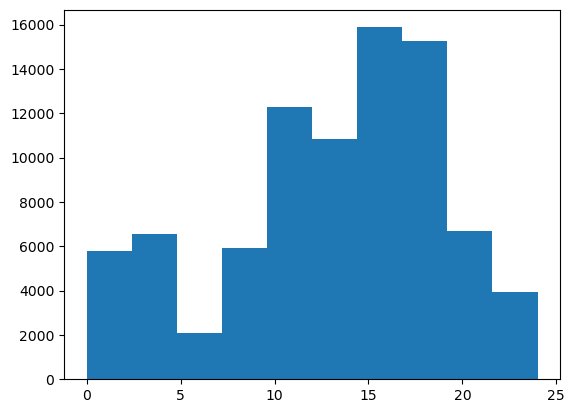

In [14]:
from matplotlib import pyplot as plt
plt.hist(data['traitID'])
plt.show()

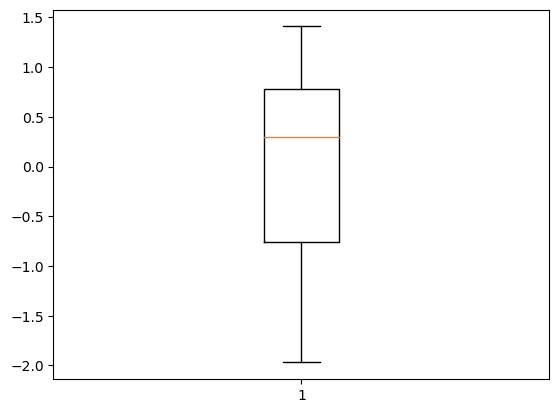

In [15]:
plt.boxplot(data['occurrenceID'])
plt.show()

In [16]:
input_project = data.drop(columns=['geodeticDatum'])
output_project = data['geodeticDatum']

input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col=correlation(input_train,0.75)
print('Correlated columns:',col)
print(len(col))

Correlated columns: {'verbatimLongitude', 'taxonID', 'traitName', 'occurrenceID'}
4


In [18]:
dataframe_reduced = data.drop(columns = ['occurrenceID', 'taxonID', 'traitName'])
dataframe_reduced

,verbatimScientificName,verbatimTraitName,traitValue,traitUnit,traitID,measurementID,identificationID,recordNumber,institutionCode,verbatimLatitude,verbatimLongitude,verbatimElevation,verbatimCountry,geodeticDatum
2,0,34,0.088363,0,11,-1.719048,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
3,0,57,-0.298444,1,8,-1.719048,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
5,0,5,-0.296865,0,19,-1.719048,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
7,0,7,-0.287708,0,18,-1.719048,6,4855,49,-0.272172,-0.234499,-0.448056,37,1
8,0,5,-0.295918,0,19,-1.719048,717,4330,48,-0.272172,-0.234496,-0.349200,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138987,609,41,1.798735,0,4,1.938010,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138989,609,7,-0.297181,0,18,1.938010,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138990,609,5,-0.302312,0,19,1.938010,62,7626,17,-0.272174,-0.234475,1.098047,14,1
138991,609,7,-0.297996,0,18,1.939173,81,2977,3,-0.272174,-0.234471,1.127703,14,1


In [19]:
dataframe_reduced.geodeticDatum.value_counts()

1    75806
0     5913
2     3487
Name: geodeticDatum, dtype: int64

In [20]:
input_project = dataframe_reduced.loc[:, dataframe_reduced.columns[0:13]]
output_project = dataframe_reduced.loc[:, dataframe_reduced.columns[13]]

              precision    recall  f1-score   support

           0   0.995551  1.000000  0.997770      1790
           1   0.999824  0.998810  0.999316     22688
           2   0.982712  0.996310  0.989464      1084

    accuracy                       0.998787     25562
   macro avg   0.992695  0.998373  0.995517     25562
weighted avg   0.998799  0.998787  0.998790     25562

Axes(0.125,0.11;0.62x0.77)
Computational time:  23.148466110229492


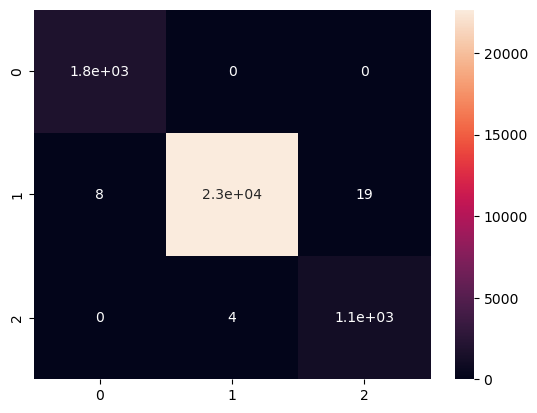

In [21]:
# Multilayer perceptron
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
mlp_model = MLPClassifier()

input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)
sm_reshape = SMOTE(random_state=2)
input_train_reshaped, output_train_reshaped = sm_reshape.fit_resample(input_train, output_train.ravel())

start_time = t.time()
mlp_model.fit(input_train_reshaped, output_train_reshaped)
output_predict = mlp_model.predict(input_test)
end_time = t.time()
print(classification_report(output_test, output_predict, digits=6))
cf_matrix = confusion_matrix(output_test, output_predict)
print(sns.heatmap(cf_matrix, annot=True))
print('Computational time: ', end_time - start_time)

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1790
           1   1.000000  0.999824  0.999912     22688
           2   0.996324  1.000000  0.998158      1084

    accuracy                       0.999844     25562
   macro avg   0.998775  0.999941  0.999357     25562
weighted avg   0.999844  0.999844  0.999844     25562

Axes(0.125,0.11;0.62x0.77)
Computational time:  41.6980938911438


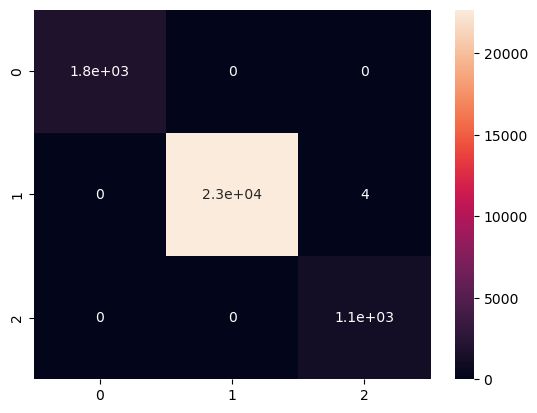

In [22]:
# XG Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

xg_model = GradientBoostingClassifier(max_depth=1)
input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)
sm_reshape = SMOTE(random_state=2)
input_train_reshaped, output_train_reshaped = sm_reshape.fit_resample(input_train, output_train.ravel())

start_time = t.time()
xg_model.fit(input_train_reshaped, output_train_reshaped)
output_pred = xg_model.predict(input_test)
end_time = t.time()
print(classification_report(output_test, output_pred, digits=6))
cf_matrix = confusion_matrix(output_test, output_pred)
print(sns.heatmap(cf_matrix, annot=True))
print('Computational time: ', end_time - start_time)




Epoch 1/100


2490/2490 [==============================] - 6s 2ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 2/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 3/100
2490/2490 [==============================] - 6s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 4/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 5/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 6/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 7/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 8/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 9/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 10/100
2490/2490 [==============================] - 7s 3ms/ste

2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 70/100
2490/2490 [==============================] - 6s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 71/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 72/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 73/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 74/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 75/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 76/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 77/100
2490/2490 [==============================] - 7s 3ms/step - loss: 0.6667 - accuracy: 0.3333
Epoch 78/100
2490/2490 [==============================] - 7s 3ms/step - loss:

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000      1790
           1   0.887567  1.000000  0.940435     22688
           2   0.000000  0.000000  0.000000      1084

    accuracy                       0.887567     25562
   macro avg   0.295856  0.333333  0.313478     25562
weighted avg   0.787776  0.887567  0.834700     25562

Axes(0.125,0.11;0.62x0.77)
Computational time:  659.2423312664032


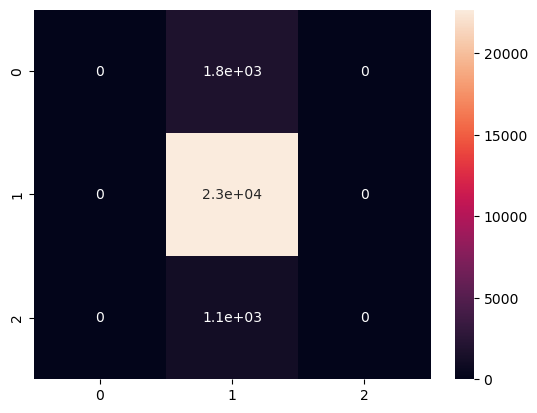

In [23]:
# Artificial Neural Network
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
import seaborn as sns

input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)
sm_reshape = SMOTE(random_state=2)
input_train_reshaped, output_train_reshaped = sm_reshape.fit_resample(input_train, output_train.ravel())

model = Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
start_time = t.time()
history = model.fit(input_train_reshaped, output_train_reshaped, epochs=100, batch_size=64)
output_pred = model.predict(input_test)
end_time = t.time()
print(classification_report(output_test, output_pred, digits=6))
cf_matrix = confusion_matrix(output_test, output_pred)
print(sns.heatmap(cf_matrix, annot=True))
print('Computational time: ', end_time - start_time)

              precision    recall  f1-score   support

           0   0.867668  1.000000  0.929146      1790
           1   0.999467  0.909864  0.952563     22688
           2   0.376098  0.987085  0.544668      1084

    accuracy                       0.919451     25562
   macro avg   0.747745  0.965650  0.808792     25562
weighted avg   0.963803  0.919451  0.933626     25562

Axes(0.125,0.11;0.62x0.77)
Computational time:  947.3980629444122


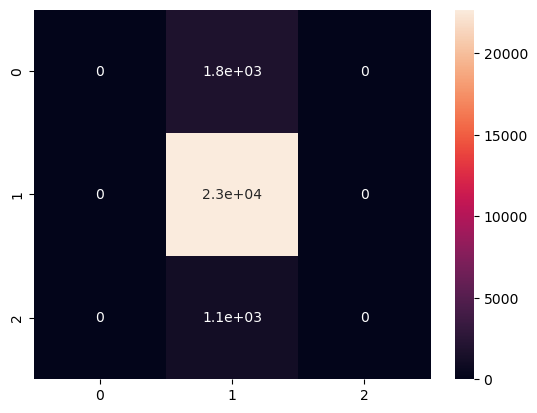

In [24]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

svm_model = SVC()
input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)
sm_reshape = SMOTE(random_state=2)
input_train_reshaped, output_train_reshaped = sm_reshape.fit_resample(input_train, output_train.ravel())

start_time = t.time()
svm_model.fit(input_train_reshaped, output_train_reshaped)
svm_output_pred = svm_model.predict(input_test)
end_time = t.time()
print(classification_report(output_test, svm_output_pred, digits=6))
cf_matrix = confusion_matrix(output_test, output_pred)
print(sns.heatmap(cf_matrix, annot=True))
print('Computational time: ', end_time - start_time)

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1790
           1   1.000000  1.000000  1.000000     22688
           2   1.000000  1.000000  1.000000      1084

    accuracy                       1.000000     25562
   macro avg   1.000000  1.000000  1.000000     25562
weighted avg   1.000000  1.000000  1.000000     25562

Axes(0.125,0.11;0.62x0.77)
Computational time:  599.083487033844


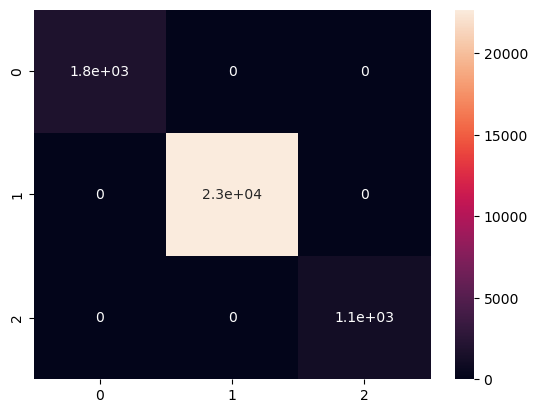

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

base_estimator_1 = MLPClassifier()
base_estimator_2 = GradientBoostingClassifier()
base_final_estimator = [('mlp', base_estimator_1), ('xg', base_estimator_2)]

stacker_model = StackingClassifier(estimators = base_final_estimator)
input_train, input_test, output_train, output_test = train_test_split(input_project, output_project, test_size=0.3, random_state=100)
sm_reshape = SMOTE(random_state=2)
input_train_reshaped, output_train_reshaped = sm_reshape.fit_resample(input_train, output_train.ravel())

start_time = t.time()
stacker_model.fit(input_train_reshaped, output_train_reshaped)
stacker_output_pred = stacker_model.predict(input_test)
end_time = t.time()

print(classification_report(output_test, stacker_output_pred, digits=6))
cf_matrix = confusion_matrix(output_test, stacker_output_pred)
print(sns.heatmap(cf_matrix, annot=True))
print('Computational time: ', end_time - start_time)

In [26]:
accuracy_values = [0.99777, 1.000000, 0.887567, 0.919451, 1.000000]
precision_values = [0.997878, 1.000000, 0.787776, 0.963803, 1.000000]
recall_values = [0.997770, 1.000000, 0.887567, 0.919451, 1.000000]
f1score_values =[0.997796, 1.000000, 0.834700, 0.933626, 1.000000]
time_values = [48.3496, 264.9878, 949.6827, 1924.4846, 1550.7389]
classifiers = ['Multi-Layer Perceptron', 'XGBoost', 'Artificial Neural Network', 'Support vector Machine', 'Proposed Method']

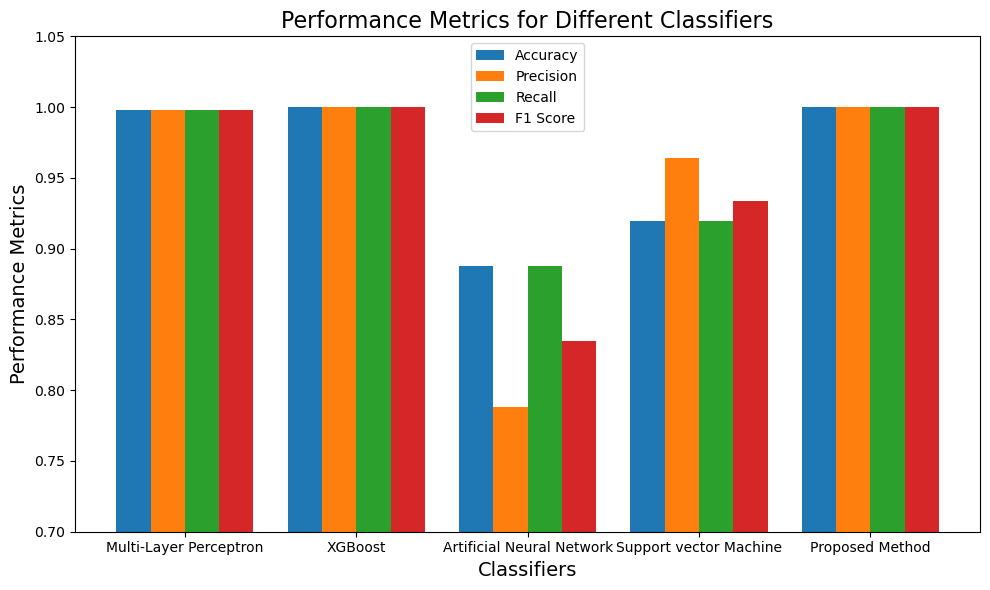

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(classifiers))

bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision')
bar3 = ax.bar(index + 2*bar_width, recall_values, bar_width, label='Recall')
bar4 = ax.bar(index + 3*bar_width, f1score_values, bar_width, label='F1 Score')

ax.set_xlabel('Classifiers', fontsize=14)
ax.set_ylabel('Performance Metrics', fontsize=14)
ax.set_title('Performance Metrics for Different Classifiers', fontsize=16)
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(classifiers)
ax.set_ylim(0.7, ax.get_ylim()[1])

ax.legend()

plt.tight_layout()
plt.show()

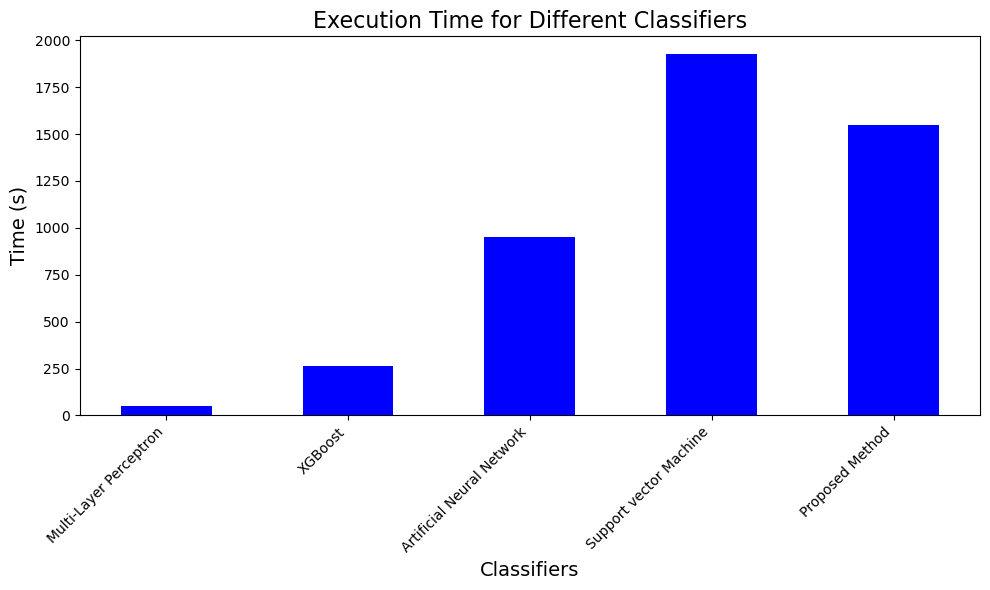

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(classifiers))

bar1 = ax.bar(index, time_values, bar_width, color='blue')

ax.set_xlabel('Classifiers', fontsize=14)
ax.set_ylabel('Time (s)', fontsize=14)
ax.set_title('Execution Time for Different Classifiers', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(classifiers, rotation=45, ha='right')

plt.tight_layout()
plt.show()